catkin_create_pkg ros_23 roscpp rospy std_msgs

catkin_create_pkg paquete_acciones_a roscpp rospy std_msgs actionlib actionlib_msgs message_generation

#Creacción de Acciones en ROS

Las acciones en ROS proporcionan un mecanismo para llevar a cabo tareas más complejas y con un control más sofisticado. Una acción consta de un goal (objetivo), un result (resultado) y un feedback (retroalimentación).

El objetivo define la tarea que se debe realizar.

El resultado contiene el estado final de la tarea

La retroalimentación proporciona información intermedia sobre el progreso de la tarea.

Las acciones se definen en archivos .action y requieren un servidor de acción y uno o varios clientes de acción.


* Cambiamos de directorio hacia nuestro paquete.


Para este caso tenemos los siguientes datos:

Espacio de trabajo: Curso_ros

paquete: paquete_acciones_a

```
roscd paquete_acciones
```
* creamos una carpeta llamada action

```
mkdir action
```
y ejecutamos visual studio code

```
code .
```
* Dentro de la carpeta action creamos un nuevo archivo con el nombre "LavarAutos2.action"

* Agregamos la estructura del archivo

```
# Definimos el objetivo(goal)
int32 number_of_cars  # Especificamos numero de automóviles
---
# Definimos el resultado(result)
int32 total_cars_cleaned # Total de automóviles limpios
---
# Definimos la retroalimentación(feedback)
float32 percent_cars_complete # Porcentaje completado
```
* moficamos el archivo CMakelist.list de la siguiente forma:

Agregar  el nombre del archivo .action y en generate_messages agregar:

```
actionlib_msgs
```


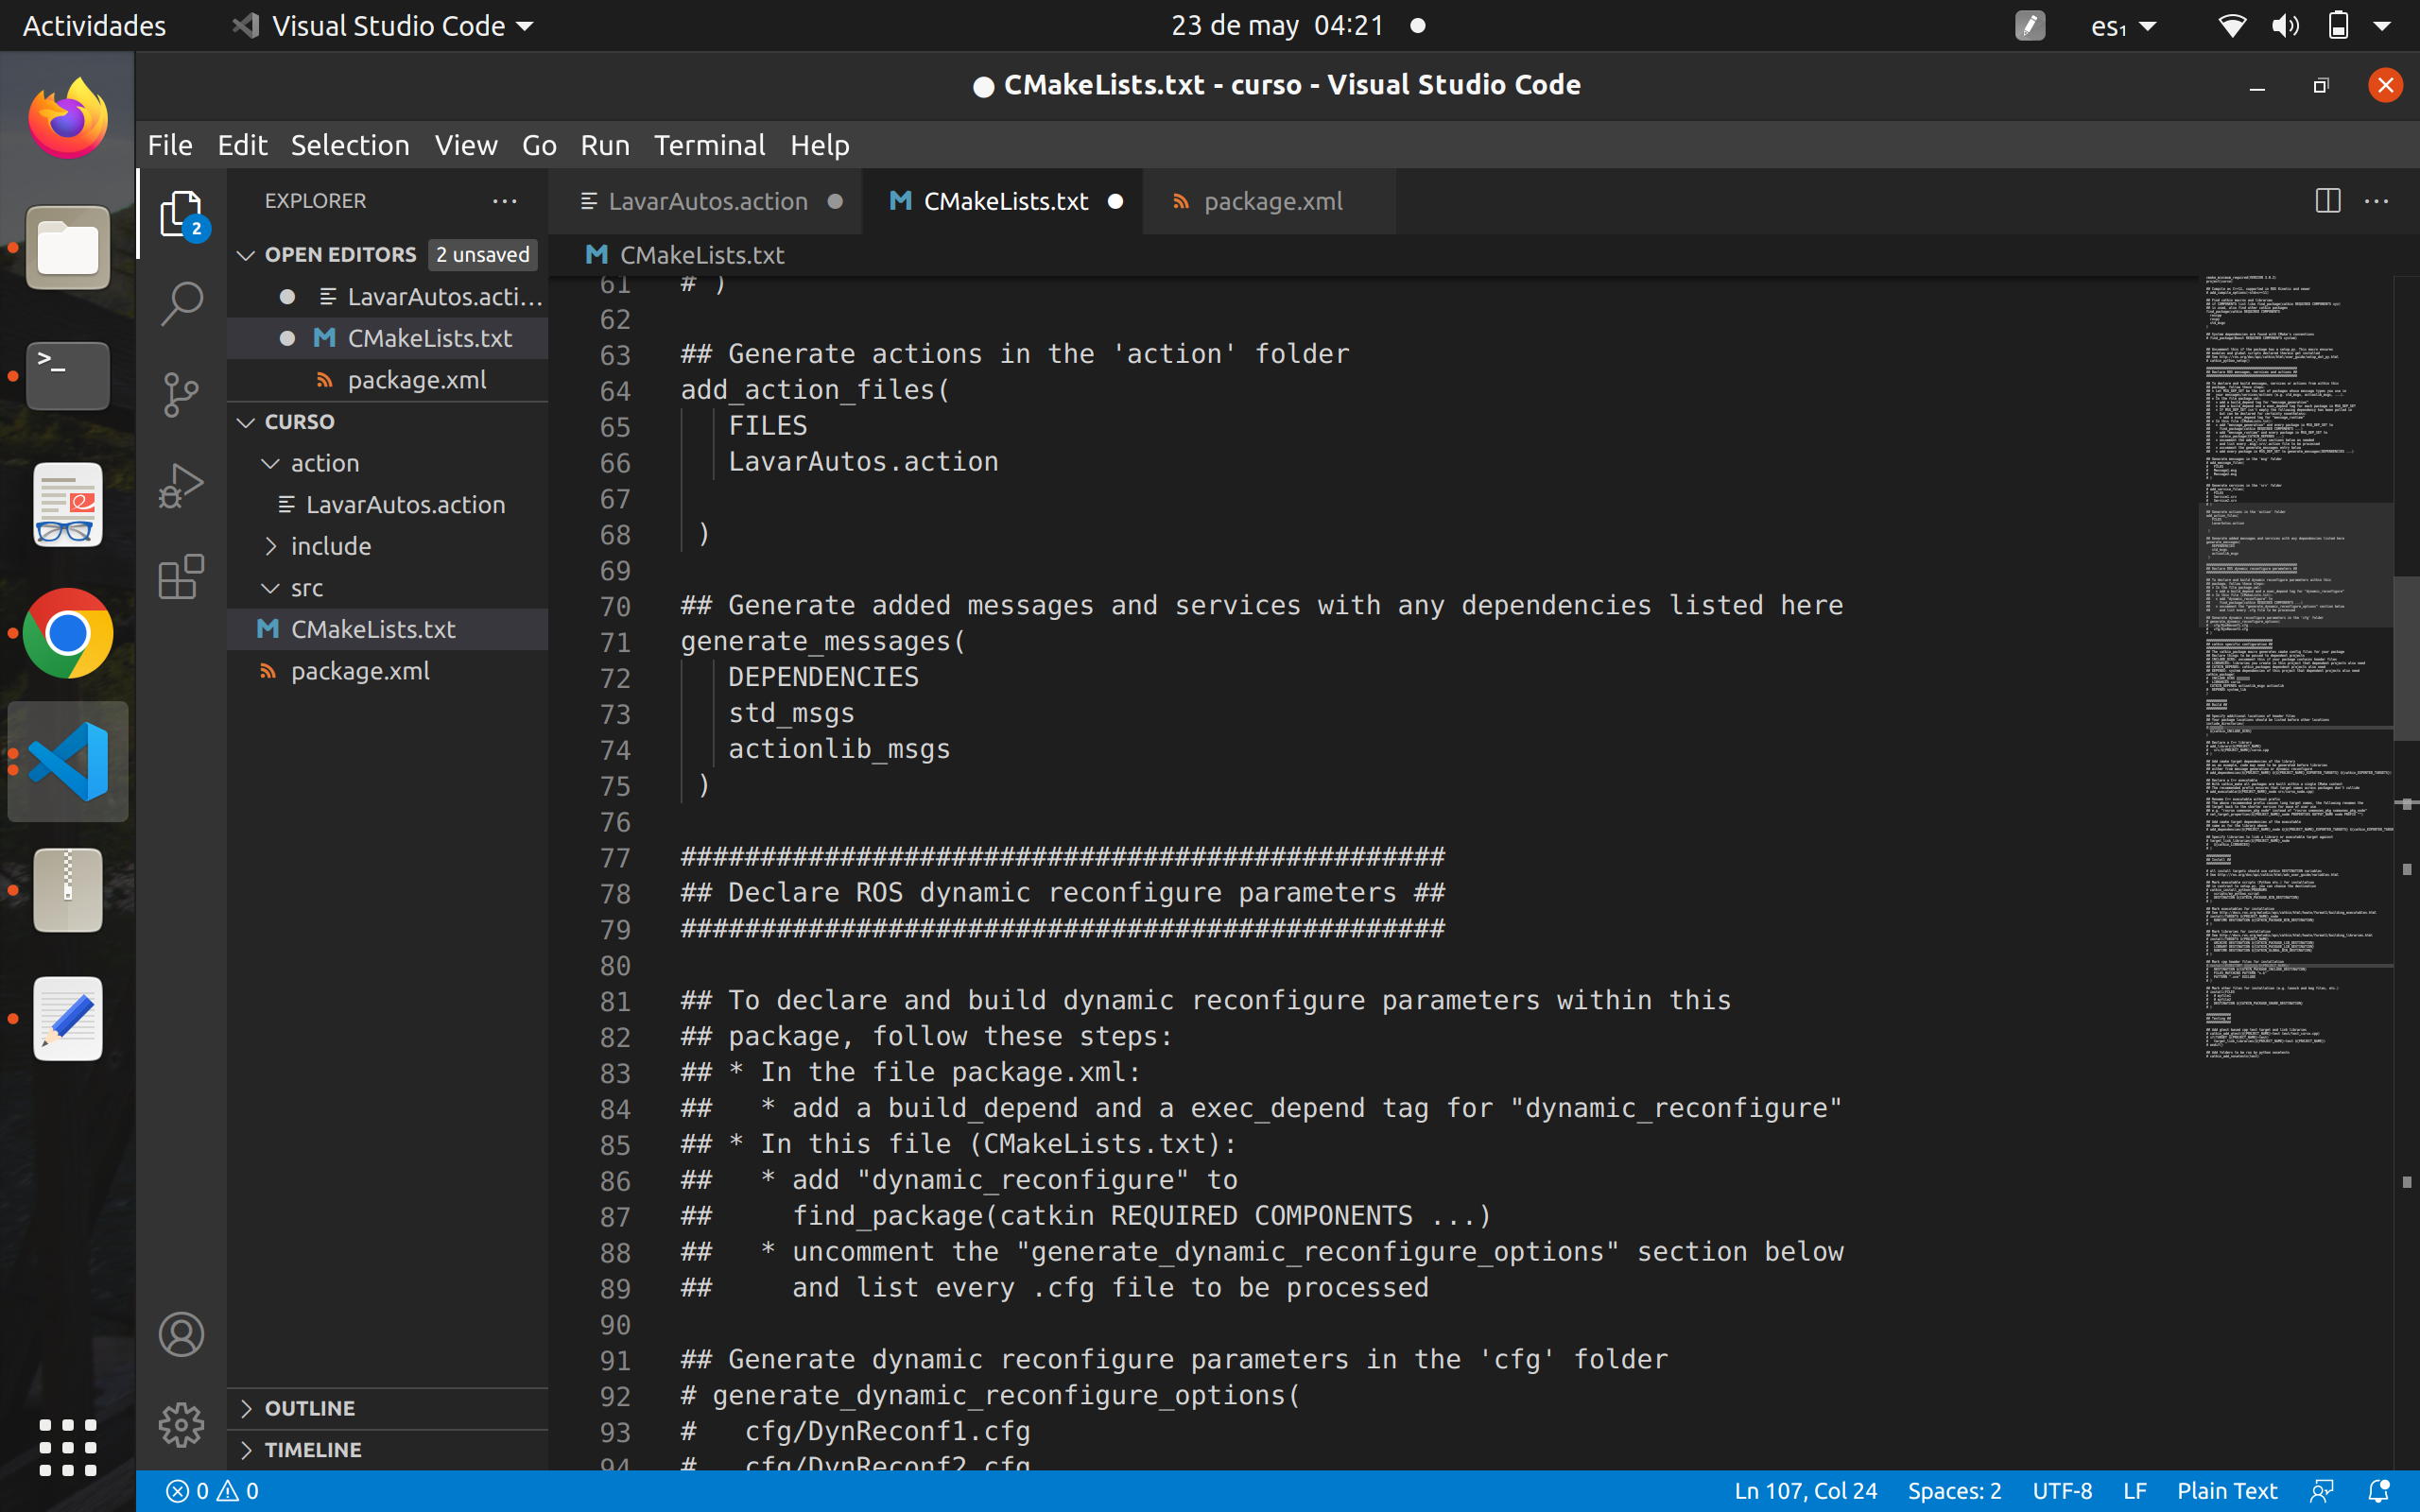

* nos ubicamos dentro del apartado:

```
  find_package(catkin REQUIRED COMPONENTS
  roscpp
  rospy
  std_msgs
)
```
y agregamos actionlib

```
  find_package(catkin REQUIRED COMPONENTS
  roscpp
  rospy
  std_msgs
  actionlib
  actionlib_msgs
  message_generation
)
```
* ahora remplazamos la linea (110 aproximadamente) por:

```
  CATKIN_DEPENDS actionlib_msgs actionlib
```



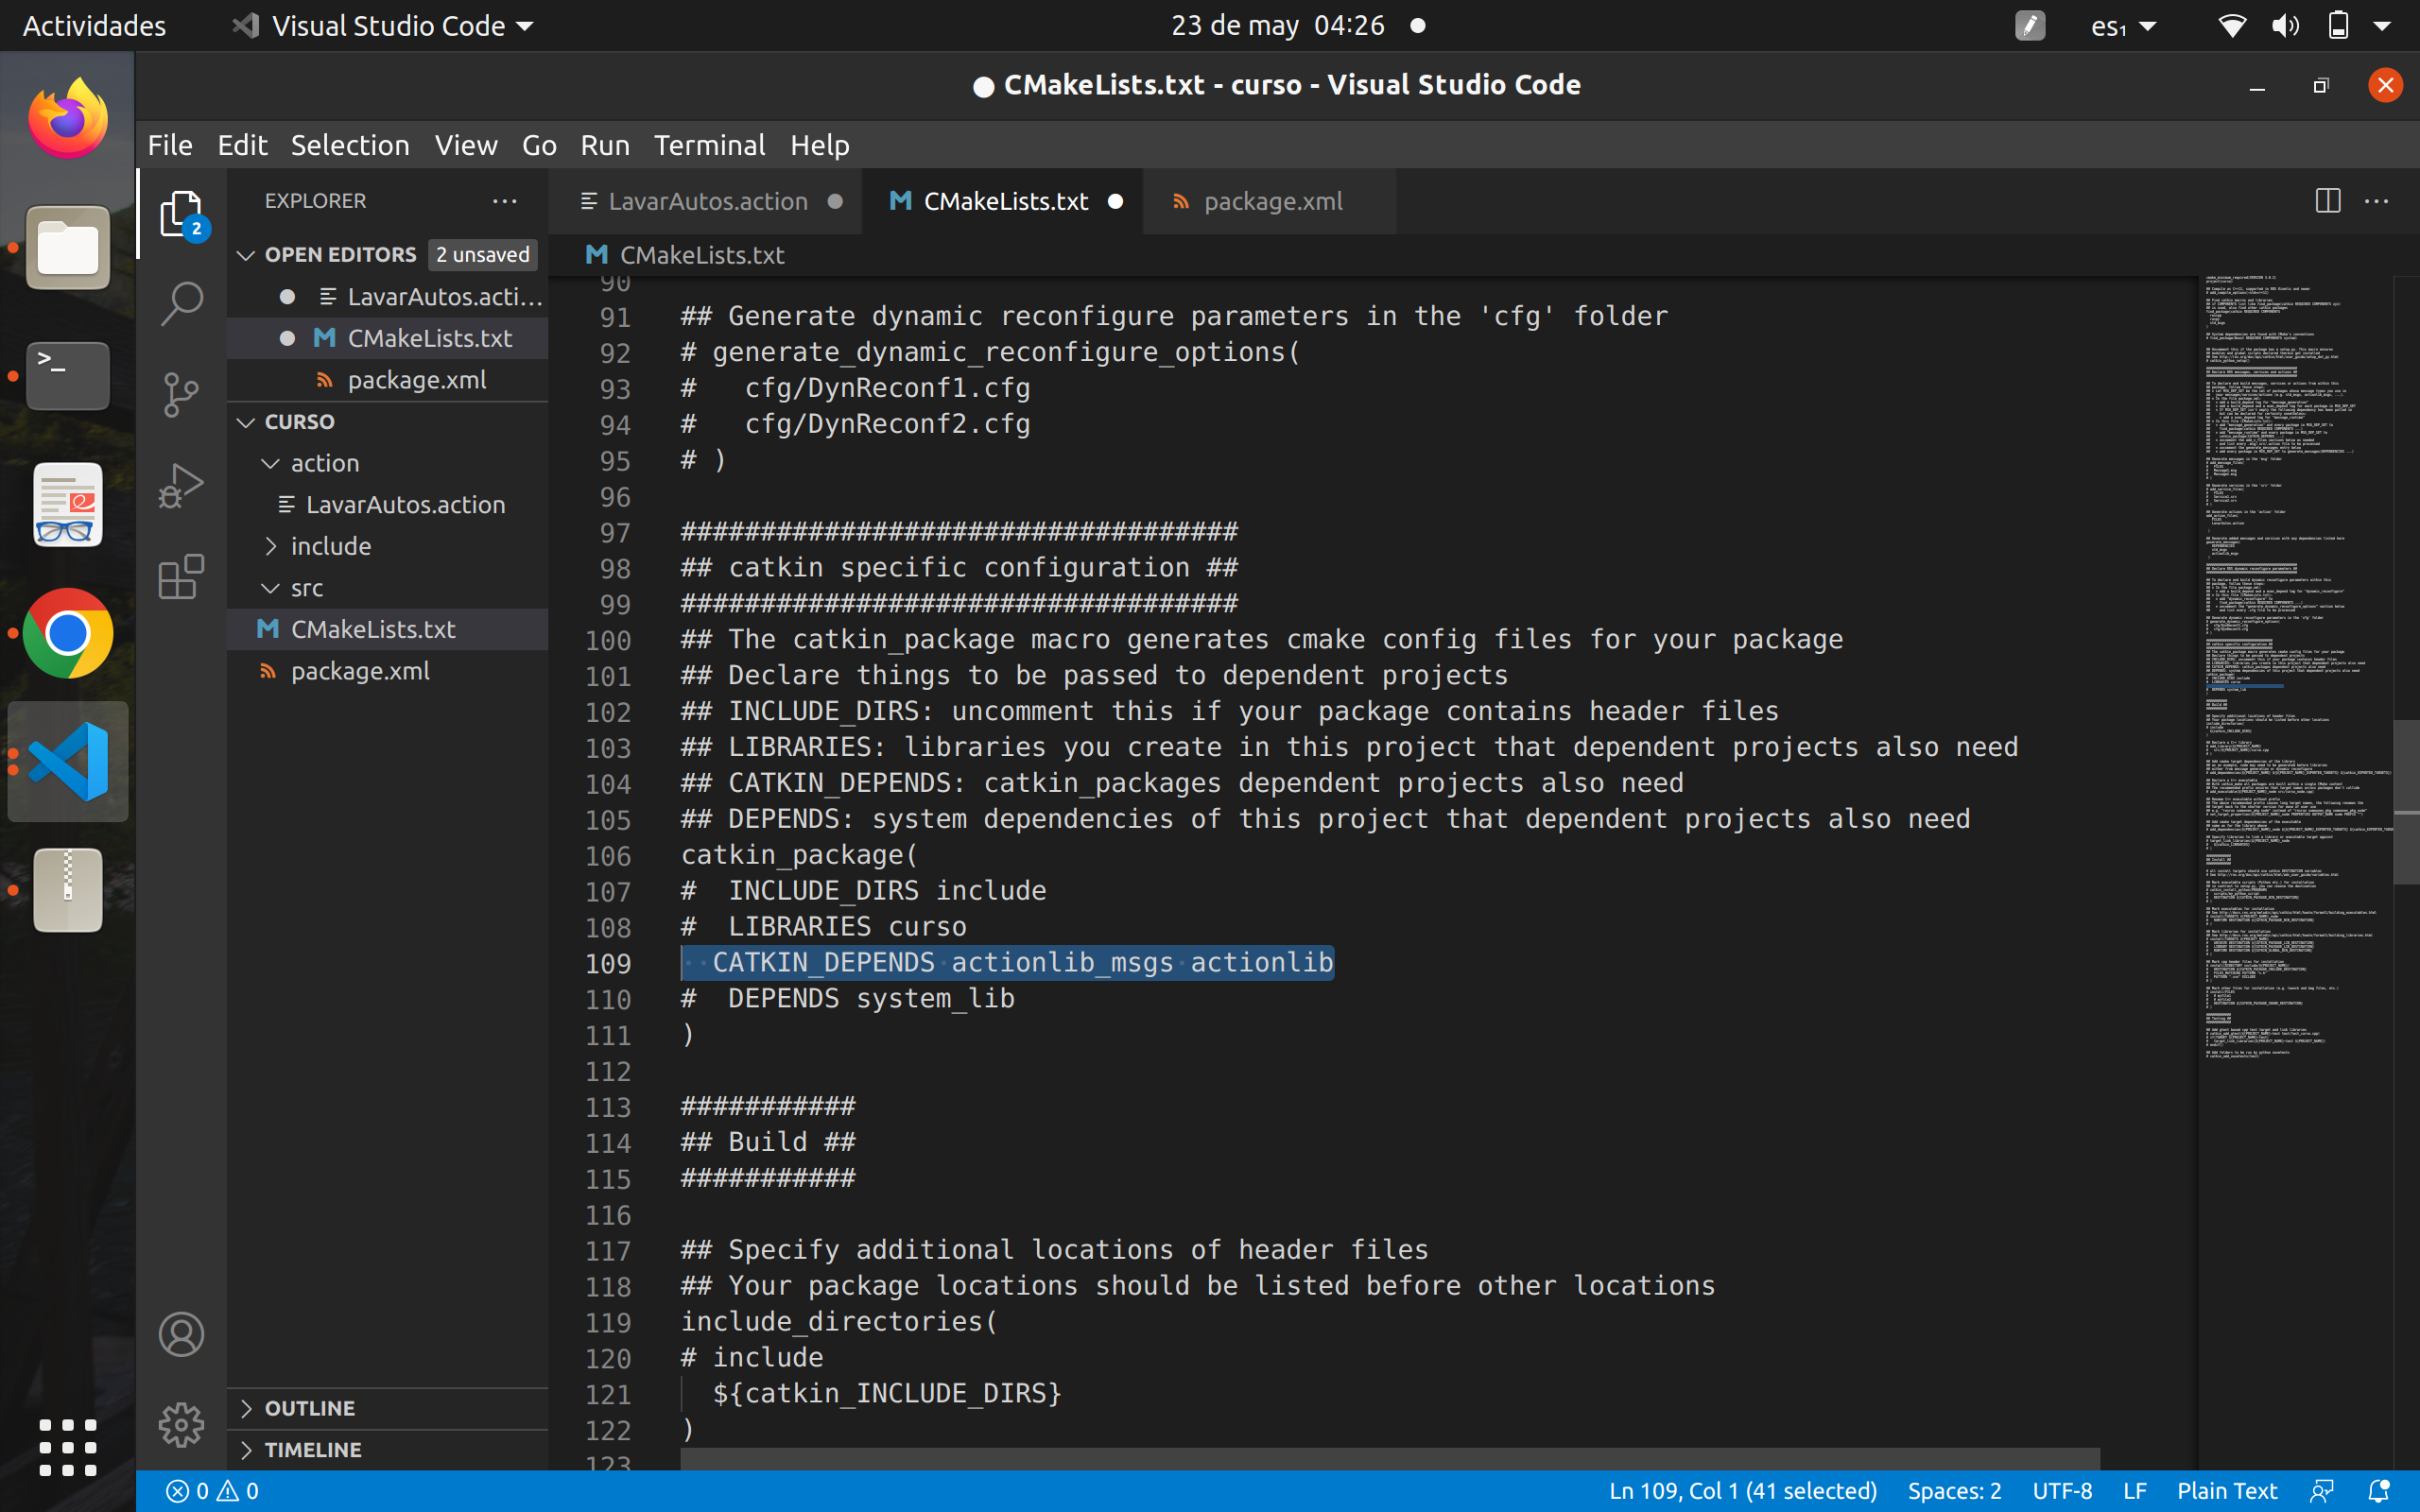

ahora dentro del archivo package.xml agregamos el siguiente comando:

```
  <build_depend>actionlib</build_depend>
  <build_depend>actionlib_msgs</build_depend>
  <build_depend>message_generation</build_depend>
  <build_export_depend>actionlib</build_export_depend>
  <build_export_depend>actionlib_msgs</build_export_depend>
  <exec_depend>actionlib</exec_depend>
  <exec_depend>actionlib_msgs</exec_depend>
```

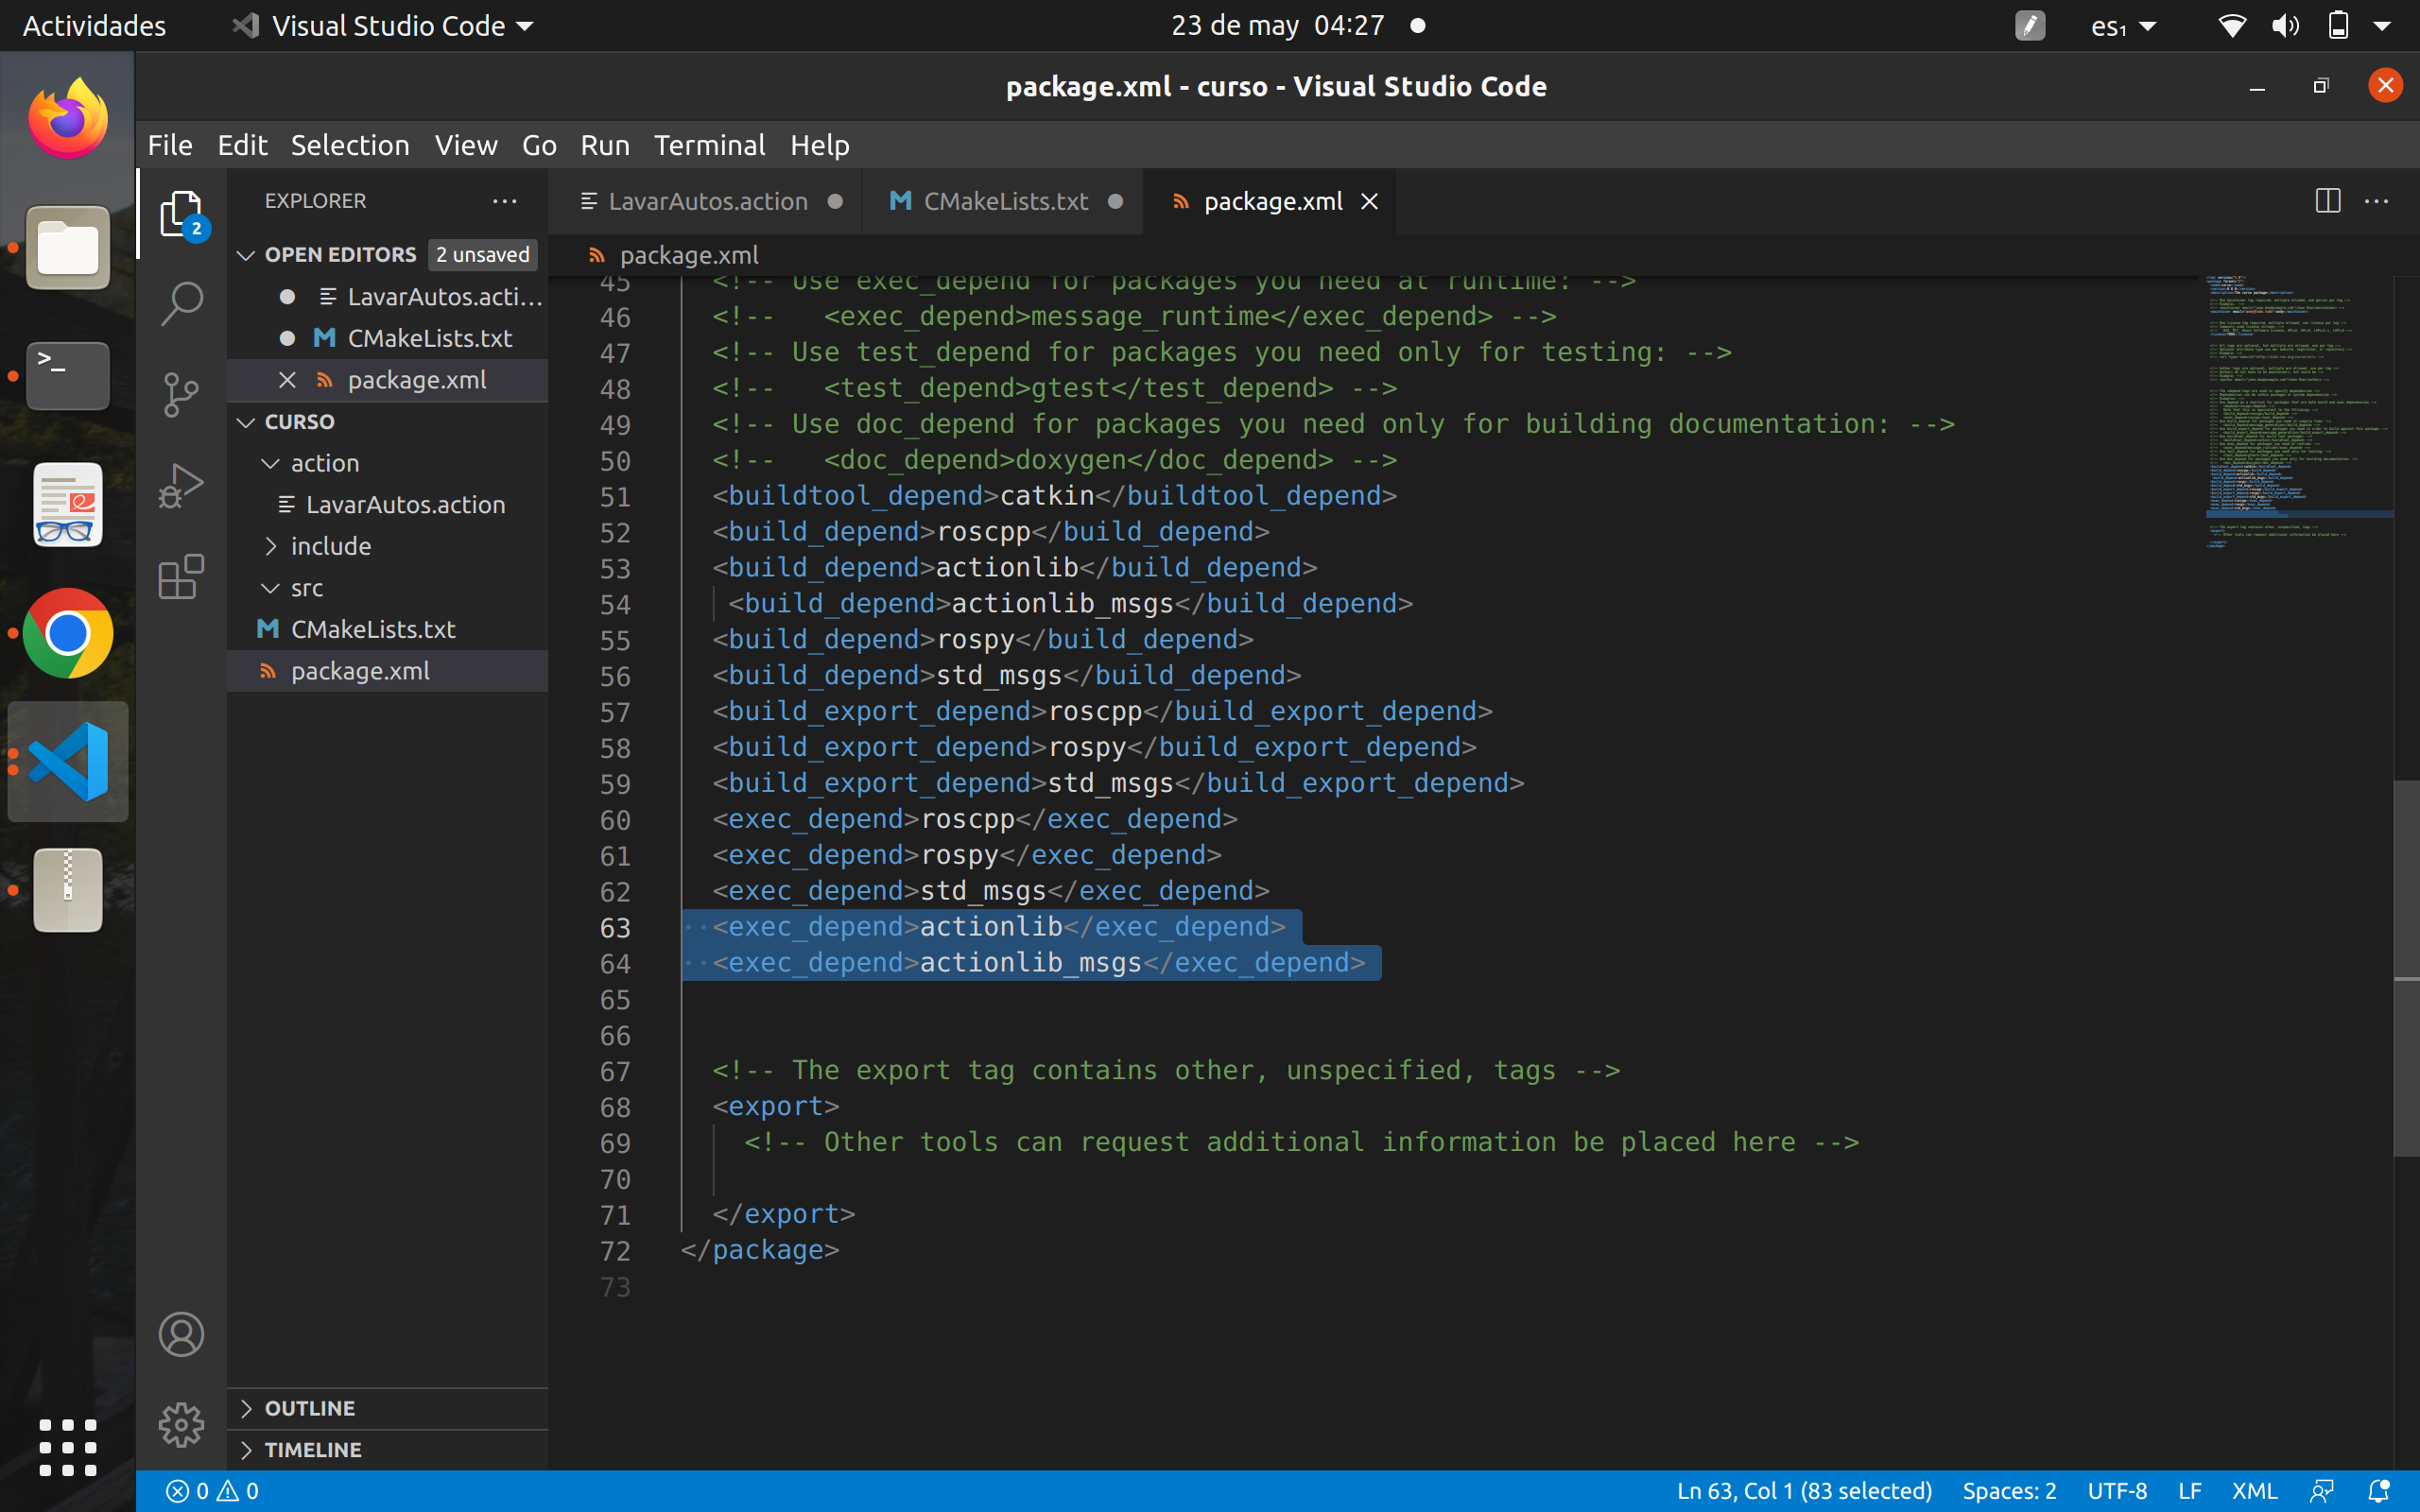

* abrimos un nuevo terminal y colocamos:
```
  cd Curso_ros
  catkin_make
```
* para observar la lista de mensajes creados usamos

```
  rosmsg list | grep LavarAutos2
```


* crear un archivo en python de nombre "nodo_action_server.py"

* copiar el código subido al classroom.

* en el terminal ejecutamo:
```
  chmod +x nodo_action_server2.py
```

* crear un archivo en python de nombre "nodo_action_cliente.py"

* copiar el código subido al classroom.

* en el terminal ejecutamo:
```
  chmod +x nodo_action_cliente2.py
```

finalmente ejectumos en 3 terminales diferentes las siguientes lineas

```
  roscore
  rosrun paquete_accion nodo_action_server2.py
  rosrun paquete_accion nodo_action_cliente2.py
```


nodo_action_server2.py
```
#!/usr/bin/env python3                         
# encoding: utf-8



import rospy                 #Importamos ropsy (interface de python-ROS)

import actionlib             #Importamos actionlib para hacer uso de acciones en ROS

from paquete_acciones_a.msg import LavarAutos2Action,LavarAutos2Result,LavarAutos2Feedback

# Importamos los mensajes de nuestra acción

class DoActionServer:

    def __init__(self):
        self.server = actionlib.SimpleActionServer('realizar_lavado_autos', LavarAutos2Action, self.execute, False)     
        #Declaramos nuestra Acción Server con nombre realziar_lavado_autos       
        #("nombre_de_la_accion",especificación_de_la_accion,F_donde procesa la informacion,
        # False)
        self.server.start()
        print("Corriendo el  action server realizar_lavado_autos ...")

    def execute(self, goal):

        feedback = LavarAutos2Feedback()   #Declaramos una variable de tipo Feedback
        result = LavarAutos2Result()       #Declaramos una variable de tipo Result
        rate = rospy.Rate(1)             #Loop 10hz

        for x in range(0,goal.number_of_cars):
            result.total_cars_cleaned += 1
            feedback.percent_cars_complete = (result.total_cars_cleaned*100.0)/goal.number_of_cars
            self.server.publish_feedback(feedback)    #Publicamos el feedback
            rate.sleep()

        self.server.set_succeeded(result)             #Publicamos el resultado


if __name__ == '__main__':
    rospy.init_node('nodo_action_servidor')
     #Creamos una instancia de la Clase DoActionServer
    server = DoActionServer()            
    rospy.spin()                         

```

nodo_action_cliente2.py
```
#!/usr/bin/env python3                         
# encoding: utf-8


import rospy          #Importamos ropsy (interface de python-ROS)
import actionlib      #Importamos actionlib para hacer uso de acciones en ROS

#Importamos los mensajes de nuestra acción
from paquete_acciones_a.msg import LavarAutos2Action, LavarAutos2Goal


def feedback_cb(msg):   #Definimos una función feedback_cb
    #Imprimimos en pantalla el feebback que envía el Action Server
    print('Feedback received -> '+str(msg)+'%')      

#Definimos una función call_server

def call_server():          
     #Declaramos nuestra Acción Cliente con nombre realizar_lavado_autos        
    client = actionlib.SimpleActionClient('realizar_lavado_autos', LavarAutos2Action)

    client.wait_for_server()    #Si el Action Server no está disponible; esperamos

    goal = LavarAutos2Goal ()    #Definimos nuestra variable de tipo Goal

    goal.number_of_cars = 50   #Definimos el número de Automóviles

    #Enviamos nuestro objetivo, y pasamos una función de Feedback
    client.send_goal(goal, feedback_cb=feedback_cb)
    #Esperamos el resultado hasta que el Action Server procese todo
    client.wait_for_result()                                             
    #Obtenemos el resultado
    result = client.get_result()                                          
    #Retornamos el resultado
    return result                                                         


if __name__ == '__main__':

    try:
        #Definimos el nombre de nuestro nodo
        rospy.init_node('nodo_action_cliente')                            
        #Llamamos a nuestra función call_server()
        result = call_server()                                           
         #Imprimimos en pantalla el resultado
        print("The result is: ", result)                                

    except rospy.ROSInterruptException :                                 
        pass

```


#Trayectorias

trayectoria2.action

In [ ]:
# Definimos el objetivo(goal)
geometry_msgs/Twist[] velocidades  # Especificamos la posición en Posición en angular
---
# Definimos el resultado(result)
int32 total_distancia_recorrida # Total de trayectoria recorrida
---
# Definimos la retroalimentación(feedback)
float32 percent_distancia_recorrida # Porcentaje completado

trayectoria_servidor.py


In [ ]:
#!/usr/bin/env python3
# encoding: utf-8


import rospy       #Importamos ropsy (interface de python-ROS)

import actionlib     #Importamos actionlib para hacer uso de acciones en ROS

from paquete_acciones.msg import trayectoria2Action,trayectoria2Result,trayectoria2Feedback
#Importamos los mensajes de nuestra acción

from geometry_msgs.msg import Twist

class DoActionServer:

    def __init__(self):
        self.server = actionlib.SimpleActionServer('control_de_trayectoria', trayectoria2Action, self.execute, False)  #Declaramos nuestra Acción Server con nombre do_wash_car
        self.server.start()
        print("Corriendo el  action para realizar el control de trayectoria")

    def execute(self, goal):

        feedback = trayectoria2Feedback()      #Declaramos una variable de tipo Feedback
        result = trayectoria2Result()          #Declaramos una variable de tipo Result
        rate = rospy.Rate(10)                 #Loop 10hz
        pub = rospy.Publisher("/turtle1/cmd_vel", Twist , queue_size=10)
        for punto in range(0,len(goal.velocidades)):
            pub.publish(goal.velocidades[punto])
            result.total_distancia_recorrida += 1
            feedback.percent_distancia_recorrida = (result.total_distancia_recorrida*100.0)/len(goal.velocidades)
            self.server.publish_feedback(feedback)                #Publicamos el feedback
            rate.sleep()

        self.server.set_succeeded(result)                         #Publicamos el resultado


if __name__ == '__main__':
    rospy.init_node('nodo_action_servidor_trayectoria')
    server = DoActionServer()                                      #Creamos una instancia de la Clase DoActionServer
    rospy.spin()

trayectoria_cliente.py


In [ ]:
#!/usr/bin/env python3
# encoding: utf-8

import rospy                                                    #Importamos ropsy (interface de python-ROS)
import actionlib                                                #Importamos actionlib para hacer uso de acciones en ROS
from paquete_acciones.msg import trayectoria2Action, trayectoria2Goal   #Importamos los mensajes de nuestra acción
from geometry_msgs.msg import Twist

def feedback_cb(msg):                                           #Definimos una función feedback_cb

    print('Feedback received -> '+str(msg)+'%')                 #Imprimimos en pantalla el feebback que envía el Action Server


def call_server():                                                        #Definimos una función call_server

    client = actionlib.SimpleActionClient('control_de_trayectoria', trayectoria2Action) #Declaramos nuestra Acción Cliente con nombre do_wash_car

    client.wait_for_server()                                              #Si el Action Server no está disponible; esperamos

    goal = trayectoria2Goal ()                                                #Definimos nuestra variable de tipo Goal

    twist1 = Twist()
    twist1.linear.x = 1.0
    twist1.linear.y = 2.0
    twist1.angular.z = 0.0

    twist2 = Twist()
    twist2.linear.x = 3.0
    twist2.linear.y = 4.0
    twist2.angular.z = 0.0

    twist3 = Twist()
    twist3.linear.x = 5.0
    twist3.linear.y = 6.0
    twist3.angular.z = 0.0

    twist4 = Twist()
    twist4.linear.x = 6.0
    twist4.linear.y = 7.0
    twist4.angular.z = 0.0

    twist5 = Twist()
    twist5.linear.x = 6.0
    twist5.linear.y = 8.0
    twist5.angular.z = 5.0

    goal.velocidades = [twist1, twist2, twist3, twist4, twist5]                                           #Definimos el número de Automóviles

    client.send_goal(goal, feedback_cb=feedback_cb)                       #Enviamos nuestro objetivo, y pasamos una función de Feedback

    client.wait_for_result()                                              #Esperamos el resultado hasta que el Action Server procese todo

    result = client.get_result()                                          #Obtenemos el resultado

    return result                                                         #Retornamos el resultado


if __name__ == '__main__':

    try:
        rospy.init_node('nodo_action_cliente_trayectoria')                            #Definimos el nombre de nuestro nodo

        result = call_server()                                           #Llamamos a nuestra función call_server()

        print("The result is: ", result)                                 #Imprimimos en pantalla el resultado

    except rospy.ROSInterruptException :                                 #Check si hay una excepción  Ctrl-C para terminar la ejecución del nodo
        pass

cmakelist

```

find_package(catkin REQUIRED COMPONENTS
  roscpp
  rospy
  std_msgs
  actionlib
  actionlib_msgs
  message_generation
  geometry_msgs
)


add_action_files(
    FILES
#   Action1.action
#   Action2.action
    LavarAutos2.action
    trayectoria2.action
 )

generate_messages(
   DEPENDENCIES
   std_msgs
   actionlib_msgs
   geometry_msgs
 )

```

package.xml

In [ ]:
 <build_depend>geometry_msgs</build_depend>
  <build_export_depend>geometry_msgs</build_export_depend>
  <exec_depend>geometry_msgs</exec_depend>

#Creacion de Servicios en ROS

Los servicios en ROS permiten la ejecución de operaciones específicas en un nodo de forma síncrona. Un servicio consta de una solicitud (request) y una respuesta (response). El cliente envía una solicitud al servidor y espera la respuesta correspondiente. Los servicios se definen en archivos .srv y requieren un nodo servidor  y uno o varios nodos clientes de servicios.

Dentro de nuestro de espacio de trabajo Curso_ros creamos el paquete:

paquete: ros_23

creamos la carpeta srv

```
mkdir srv
```
y ejecutamos visual studio code

```
code .
```
* Dentro de la carpeta srv creamos un nuevo archivo con el nombre
"cinematicaI.srv"

```
cinematicaI.srv
```
* Agregamos la estructura del archivo

```
#Request
int64 x
int64 y
int64 z
---
#Response
float32[] angulos
int64 altura
```
* moficamos el archivo CMakelist.list de la siguiente forma:

 aproximadamente linea 59

Descomentamos la generacion de servicios
Agregamos el servicio
Descomentamos la generacion de mensajes


```
find_package(catkin REQUIRED COMPONENTS
  roscpp
  rospy
  std_msgs
  message_generation
)


 add_service_files(
    FILES
    cinematicaI.srv
 )

generate_messages(
DEPENDENCIES
std_msgs
 )
```


 en el archivo package.xml revisar que existe la linea de código:

```

    <build_depend>message_generation</build_depend>

```



* abrimos un nuevo terminal y colocamos:
```
  cd Curso_ros
  catkin_make
```
inicializamos nuestro entorno de ROS
```
roscore
```
colocamos para compronbar
```
rossrv show cinematicaI
```


nodo_server.py
```
#!/usr/bin/env python3                         
# encoding: utf-8

import rospy                                                                #Importamos ropsy (interface de python-ROS)
from std_msgs.msg import Float32MultiArray
from ros_23.srv import cinematicaI, cinematicaIResponse                     #Importamos módulos generados por nuestro servicio


def calculoCI(req):
    #Definimos para procesar la data enviada por el Cliente
    print ("Returning C.I. ")      
    #Imprimimos en pantalla los valores que recibimos
    #ecuaciones del caculo
    
    # respuesta
    angulos = Float32MultiArray()
    angulos.data = [req.x+0.2, req.y+0.3]
    
    return cinematicaIResponse(angulos.data, req.x,)                            #Retornamos al Cliente, el resultado de la suma de dos números enteros

def nodo():                                                                 #Definimos una función nodo                                   

    rospy.init_node('nodo_cinameticaI_server')                            #Inicializamos nuestro nodo y le asignamos un nombre = nodo_suma_two_ints_server

    #Declaramos nuestro Servicio Server    
                      #Nombre del servicio | Clase Servicio|Función para procesar la data enviada por el Cliente     
    s = rospy.Service('CinematicaI', cinematicaI, calculoCI)   

    print("Listo para calcular la cinemática inversa") #Imprimimos un mensaje en pantalla

    rospy.spin()                    #Mantiene corriendo el script hasta que se pulsa Crtl+C

if __name__ == '__main__':                                  
    try:
        nodo()                                                              # Lamamos a la función nodo
    except rospy.ROSInterruptException:                                     # Check si hay una excepción  Ctrl-C para terminar la ejecución del nodo
        pass                                                                            
 ```                      

nodo_cliente.py
```

#!/usr/bin/env python3                         
# encoding: utf-8

import rospy                              #Importamos ropsy (interface de python-ROS)
from ros_23.srv import cinematicaI        #Importamos el modulo generado por nuestro servicio

def cinameticaI_client(x, y, z):               #Definimos una función para enviar la data al Service Server y obtener el resultado
    rospy.wait_for_service('CinematicaI')  #Esperamos el servicio si no está listo                                                                
    try:
        #Definimos el Servicio Cliente en la variable add_two_ints
                                          #Nombre Servicio|Clase Servicio
        calculo = rospy.ServiceProxy('CinematicaI', cinematicaI)  
        resp = calculo(x, y, z)       #Enviamos la data para ser procesada en el Service Server


        # Continuo con el ejercicio



        # ------------------------
        return resp.altura , resp.angulos                #Retornamos el resultado de la operación
    except rospy.ServiceException as e :    #Si hay una excepción durante el procesamiento lo imprimimos
        print("Service call failed: %s"%e)

def nodo():                                       #Definimos una función nodo                                   

    rospy.init_node('cinematicaI_client')  #Inicializamos nuestro nodo y le asignamos un nombre = cinameticaI_client

    #Definimos dos variables x & y para realizar la suma de los dos números enteros
    x = 7                                         
    y = 8
    z = 3

    print("Requesting %s,%s,%s "%(x, y ,z ))           #Imprimimos en pantalla la posición requerida

    #Imprimimos el resultado de la operación de los dos números enteros
    #La operación de CI cinameticaI_client
    print(cinameticaI_client(x, y, z))


if __name__ == '__main__':                                  
    try:
        nodo()                               # Lamamos a la función nodo
    except rospy.ROSInterruptException:      # Check si hay una excepción  Ctrl-C para terminar la ejecución del nodo
        pass
```

```
rospack find geometry_msgs
rosmsg package geometry_msgs
rosmsg show geometry_msgs/PoseStamped
```

```
rosrun turtlesim turtlesim_node
rostopic
rostopic list
rostopic pub /turtle1/cmd_vel geometry_msgs/Twist "linear:
  x: 0.0
  y: 10.0
  z: 0.0
angular:
  x: 0.0
  y: 0.0
  z: 20.0"

```